In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNNSNMetric_nSN_Total detected',
       '1 to 10 day Microlensing_Fraction detected of total (mean)',
       '100 to 1000 day Microlensing_Fraction detected of total (mean)',
       'KNePopMetric__multi_color_detect_Fraction detected of total (mean)',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Fraction detected of total (mean)',
       'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
       'WeakLensingNvisits_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFSa,u', 'DD:EDFSb,u', 'DD:ELAISS1,g',
       'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g', 'DD:EDFSa,g', 'DD:E

In [8]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNNSNMetric_nSN_Total detected',
        'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)',
        'WeakLensingNvisits_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        '1 to 10 day Microlensing_Fraction detected of total (mean)', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNNSNMetric_nSN_Total detected': 'SNeIa',
               '1 to 10 day Microlensing_Fraction detected of total (mean)': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Fraction detected of total (mean)': 'TDE',
               'TDEsPopMetric__some_color_pu_Fraction detected of total (mean)':'TDE',
               'WeakLensingNvisits_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [9]:
data['runName']


0     vary_nes_nesfrac0.01
1     vary_nes_nesfrac0.05
2     vary_nes_nesfrac0.10
3     vary_nes_nesfrac0.15
4     vary_nes_nesfrac0.20
5     vary_nes_nesfrac0.25
6     vary_nes_nesfrac0.30
7     vary_nes_nesfrac0.35
8     vary_nes_nesfrac0.40
9     vary_nes_nesfrac0.45
10    vary_nes_nesfrac0.50
11    vary_nes_nesfrac0.55
12    vary_nes_nesfrac0.75
13    vary_nes_nesfrac1.00
Name: runName, dtype: object

In [10]:
runs =  [name for name in data['runName'].values]
runs

['vary_nes_nesfrac0.01',
 'vary_nes_nesfrac0.05',
 'vary_nes_nesfrac0.10',
 'vary_nes_nesfrac0.15',
 'vary_nes_nesfrac0.20',
 'vary_nes_nesfrac0.25',
 'vary_nes_nesfrac0.30',
 'vary_nes_nesfrac0.35',
 'vary_nes_nesfrac0.40',
 'vary_nes_nesfrac0.45',
 'vary_nes_nesfrac0.50',
 'vary_nes_nesfrac0.55',
 'vary_nes_nesfrac0.75',
 'vary_nes_nesfrac1.00']

In [11]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='vary_nes_nesfrac0.30')
data_normed = data_normed.rename(columns=name_mapper)

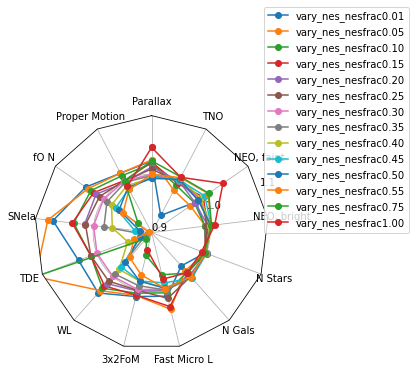

In [13]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [14]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,vary_nes_nesfrac0.01,1.022391,1.014716,1.037037,1.070031,1.033708,1.037838,1.012551,1.011981,0.976186,0.997816,0.991192,0.992341,0.933190
1,vary_nes_nesfrac0.05,1.024215,1.014755,1.032258,1.078738,1.112360,1.032432,1.010686,1.034874,0.986797,0.997453,0.992696,0.980306,0.981835
2,vary_nes_nesfrac0.10,1.017965,1.009792,1.026284,1.034273,1.011236,1.027027,1.006632,1.005991,0.990693,1.000905,0.991837,0.989059,0.991071
3,vary_nes_nesfrac0.15,1.020331,1.000514,1.020311,1.036822,1.011236,1.021622,1.010201,1.030167,0.992341,0.996578,0.996133,1.007112,0.995074
4,vary_nes_nesfrac0.20,1.012251,0.996978,1.015532,1.015650,0.853933,1.016216,1.002739,1.002567,0.997461,1.000558,0.996778,0.990153,1.000000
5,vary_nes_nesfrac0.25,1.008736,1.000413,1.008363,1.014032,1.011236,1.010811,1.001641,1.015618,1.000420,0.999479,0.995704,1.002188,0.997537
6,vary_nes_nesfrac0.30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,vary_nes_nesfrac0.35,0.997725,0.997140,0.992832,0.982177,0.910112,0.994595,0.993381,1.001070,1.001840,0.998362,1.001504,0.997812,0.999692
8,vary_nes_nesfrac0.40,0.993539,0.990870,0.983274,0.967833,0.943820,0.983784,0.985424,0.996791,1.002618,0.999978,1.000000,1.002735,1.004310
9,vary_nes_nesfrac0.45,0.995953,0.983952,0.974910,0.929160,0.921348,0.978378,0.985317,0.988447,1.004165,0.999004,1.002363,1.010394,1.001539


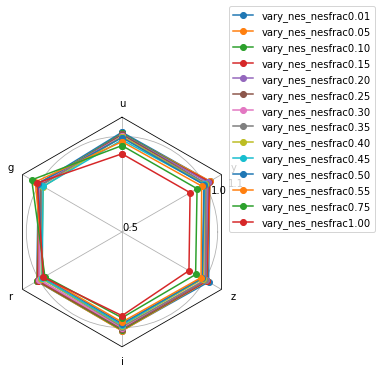

In [16]:
data_normed = norm_df(data, runs, mag_cols, norm_run='vary_nes_nesfrac0.30',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], alpha=.1)
fig.tight_layout()

In [11]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'twi_p' in name] 

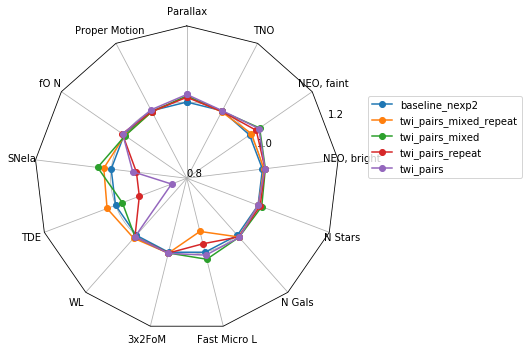

In [12]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

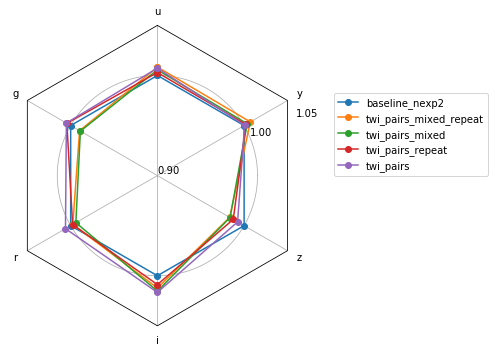

In [13]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [14]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'twi_ne' in name] 
runs

['baseline_nexp2',
 'twi_neo_pattern1',
 'twi_neo_pattern2',
 'twi_neo_pattern3',
 'twi_neo_pattern4',
 'twi_neo_pattern5',
 'twi_neo_pattern6',
 'twi_neo_pattern7']

In [15]:
indices = [np.max(np.where(data['runName'] == name)[0]) for name in runs]
data['NEO bright'][indices]

1     0.9110
59    0.9824
60    0.9760
61    0.9706
62    0.9590
63    0.9754
64    0.9750
65    0.9684
Name: NEO bright, dtype: float64

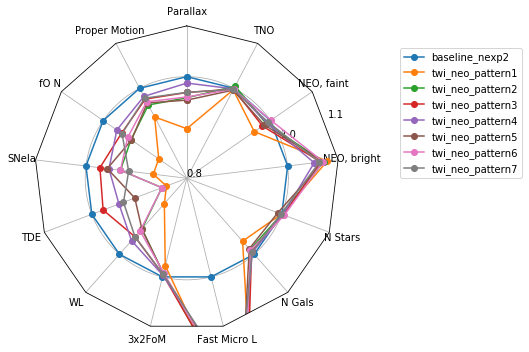

In [16]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

In [17]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
1,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
59,twi_neo_pattern1,0.897623,0.936284,0.867117,0.866450,0.842857,0.866667,0.977319,1.360131,0.965598,0.998998,1.078375,0.961558,0.996567
60,twi_neo_pattern2,0.958472,0.962898,0.933559,0.931596,0.852381,0.933333,0.993045,1.300654,0.987618,0.999706,1.071350,0.989749,1.004682
61,twi_neo_pattern3,0.968861,0.975964,0.956081,0.972313,0.976190,0.953846,0.995640,1.288889,0.992383,1.003359,1.065423,0.981035,0.998127
62,twi_neo_pattern4,0.987381,0.981917,0.967342,0.954397,0.942857,0.964103,0.996782,1.230719,0.994780,1.002421,1.052689,0.991799,0.998752
63,twi_neo_pattern5,0.953810,0.967483,0.932432,0.957655,0.909524,0.933333,0.993149,1.247712,0.985501,0.991592,1.070692,0.985136,0.995943
64,twi_neo_pattern6,0.960075,0.969912,0.941441,0.931596,0.852381,0.938462,0.991488,1.271242,0.988967,1.005240,1.070252,1.001025,0.998127
65,twi_neo_pattern7,0.969052,0.978124,0.954955,0.915309,0.933333,0.953846,0.994706,1.230719,0.993694,0.998214,1.063008,0.994362,0.997815


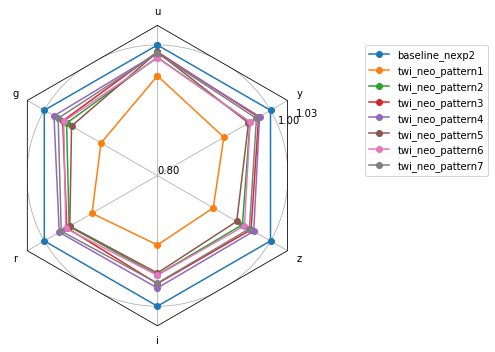

In [18]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.03])
fig.tight_layout()
#fig.savefig('radar_plots/var_exp_mags_radar.pdf')

In [19]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'pair_times' in name] 
runs

['baseline_nexp2',
 'pair_times_11',
 'pair_times_22',
 'pair_times_33',
 'pair_times_44',
 'pair_times_55']

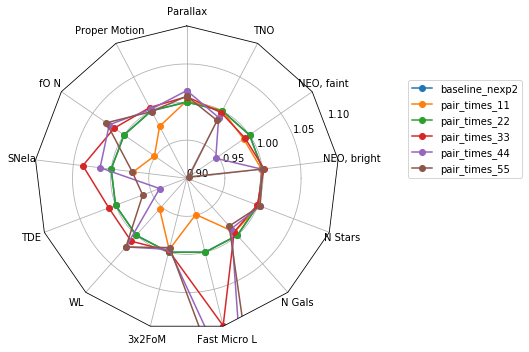

In [20]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='pair_times_22')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

In [21]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'footprint' in name] 
runs

['baseline_nexp2',
 'footprint_0_v1.710yrs_glance',
 'footprint_1_v1.710yrs_glance',
 'footprint_2_v1.710yrs_glance',
 'footprint_3_v1.710yrs_glance',
 'footprint_4_v1.710yrs_glance',
 'footprint_5_v1.710yrs_glance',
 'footprint_6_v1.710yrs_glance',
 'footprint_7_v1.710yrs_glance',
 'footprint_8_v1.710yrs_glance']

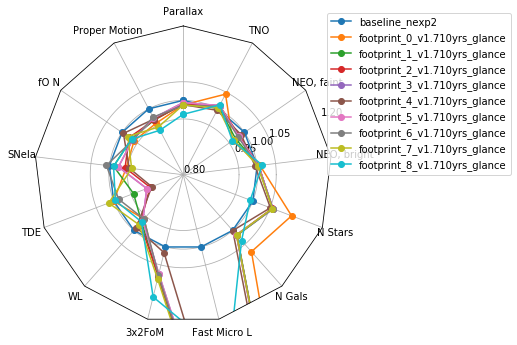

In [22]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.2])
fig.tight_layout()

In [23]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'rolling' in name and '_nm' not in name] 
runs

['baseline_nexp2',
 'rolling_scale0.2_nslice2',
 'rolling_scale0.2_nslice3',
 'rolling_scale0.4_nslice2',
 'rolling_scale0.4_nslice3',
 'rolling_scale0.6_nslice2',
 'rolling_scale0.6_nslice3',
 'rolling_scale0.8_nslice2',
 'rolling_scale0.8_nslice3',
 'rolling_scale0.9_nslice2',
 'rolling_scale0.9_nslice3',
 'rolling_scale1.0_nslice2',
 'rolling_scale1.0_nslice3']

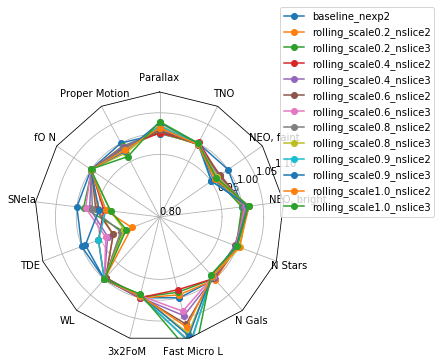

In [24]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

In [25]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'rolling_nm' in name] 
runs

['baseline_nexp2',
 'rolling_nm_scale0.2_nslice2',
 'rolling_nm_scale0.2_nslice3',
 'rolling_nm_scale0.4_nslice2',
 'rolling_nm_scale0.4_nslice3',
 'rolling_nm_scale0.6_nslice2',
 'rolling_nm_scale0.6_nslice3',
 'rolling_nm_scale0.8_nslice2',
 'rolling_nm_scale0.8_nslice3',
 'rolling_nm_scale0.9_nslice2',
 'rolling_nm_scale0.9_nslice3',
 'rolling_nm_scale1.0_nslice2',
 'rolling_nm_scale1.0_nslice3']

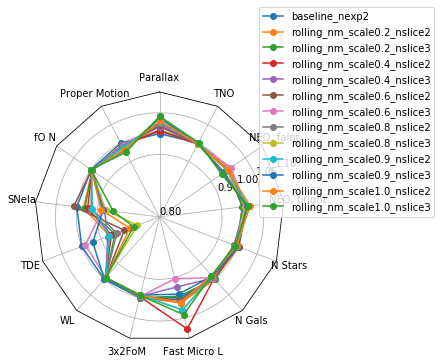

In [26]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

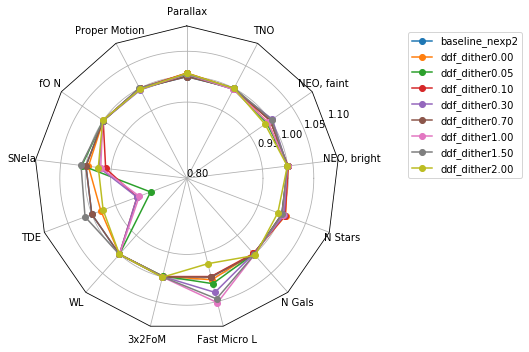

In [27]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'ddf_dither' in name] 

data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

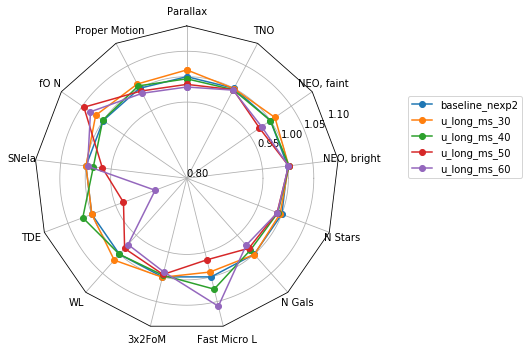

In [28]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'u_long' in name] 

data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

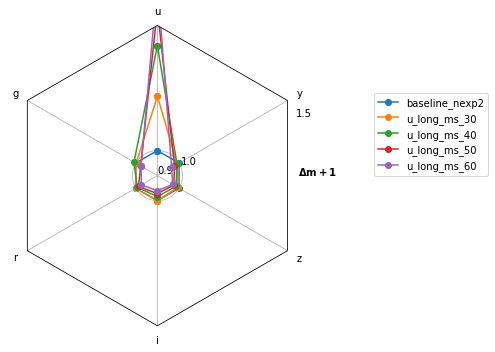

In [29]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.5])
fig.text(.68,.5, '$\mathbf{\Delta m+1}$',  fontweight='bold')
fig.tight_layout()
#fig.savefig('radar_plots/var_exp_mags_radar.pdf')

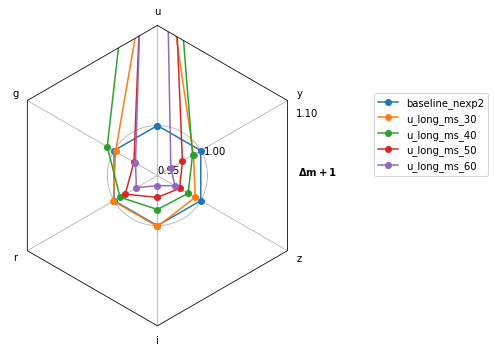

In [30]:

fig, ax = radar(data_normed, legend=True, rgrids=[0.95, 1.0, 1.1])
fig.text(.68,.5, '$\mathbf{\Delta m+1}$',  fontweight='bold')
fig.tight_layout()

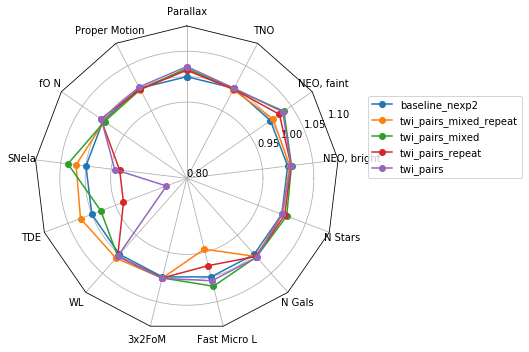

In [31]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'twi_pair' in name] 

data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

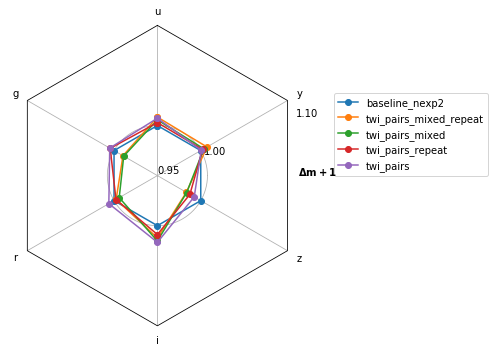

In [32]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)


fig, ax = radar(data_normed, legend=True, rgrids=[0.95, 1.0, 1.1])
fig.text(.68,.5, '$\mathbf{\Delta m+1}$',  fontweight='bold')
fig.tight_layout()